# Python exercise 'estimate gradient’ 

## Import Statements

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import random
import seaborn as sns

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats 
from sklearn.datasets import make_regression 


## Part 1

Pick three vectors from the table, using letters from your names and using each column.

In [2]:
# We pick C, K and A from Cathy and Kai
u = np.array([19., 41.]) # from C
v = np.array([86., 6.])  # from K
w = np.array([56., 20.]) # from A

Define the distance between two vectors as x, u as:
Dist (x,u)= (x1-u1)^2+(x2-u2)^2

Define the similarity function:
Diff(x) = ln(1+Dist(u,x))+ln(1+Dist(v,x))+ln(1+Dist(w,x))

Diff(x) is the distance between person x and your focus group of three people.



In [3]:
def dist(x,u):
    #return (x[0]-u[0])**2 + (x[1]-u[1])**2
    return np.sum((x - u) ** 2)

def diff(x):
    return np.log((1 + dist (u, x))) + np.log((1 + dist (v, x))) + np.log((1 + dist (w, x)))

## Part 2

Compute Diff(x) for 20 random points. 

What is the average value of Diff?
What is the lowest and highest value you found?


In [4]:
diffs = []

for i in range(20):
    #based on the values in the table I decided to pick a random number between 0 and 100
    diffs.append(diff(np.array([float(random.randrange(100)), float(random.randrange(100))]))) 

print(diffs)
print(f"Average: {np.mean(diffs)}, Lowest Value: {min(diffs)}, Highest Value: {max(diffs)}")

[23.718274793369627, 21.675966828654808, 25.745441986756134, 25.561257962188165, 22.788539651803845, 22.83646393405298, 25.816230584156656, 22.52849318626039, 25.395396721355777, 23.210713106624784, 23.36265282136241, 25.268599094411236, 23.016265274893982, 26.506210659713364, 24.49176054166405, 24.788612393865463, 20.883762746789607, 25.327501679421516, 19.875117879328926, 25.305462457066284]
Average: 23.905136215186996, Lowest Value: 19.875117879328926, Highest Value: 26.506210659713364


**Is random search a good way to minimize this function?**

No.

We have to hope that we randomly stumple across the vector with the minimum distance in our sample. 

We have no way of verifying if the lowest value we found is the minimum value.



## Part 3

Set x0=(50,50). Compute Diff(x)=Diff(50,50).

In [5]:
x0 = np.array([50., 50.])
diff_x0 = diff(x0)

print(x0)
print(diff_x0)

[50. 50.]
21.873705514964627


## Part 4

Create a function to compute and print the gradient of Diff by using a small delta=0.001.

In [6]:
def gradient(x, delta=.001):
    start = diff(x)
    result = []
    for i in range(len(x)):
        #change each number in x by delta
        x[i] += delta
        step = diff(x)
        result.append((step - start)/delta)
        x[i] -= delta
    return np.array(result)

## Part 5

Use this function to print the gradient at (0,0), (100,0), (0,100) and (100,100). 

In [7]:
points = np.array([[0., 0.],[100., 0.],[0., 100.],[100., 100.]])

for point in points:
    print(f"Gradient at {point}\tis {gradient(point)}")


Gradient at [0. 0.]	is [-0.07340544 -0.05306046]
Gradient at [100.   0.]	is [ 0.17747654 -0.07856262]
Gradient at [  0. 100.]	is [-0.03222729  0.05906304]
Gradient at [100. 100.]	is [0.02978588 0.05175347]


**Based on these values, where could be a minimum of Diff?**

The gradient at (0, 0), (0, 100) and (100, 100) is almost 0 so based on just the gradient any of these could be close to the minimum of Diff, assuming the funnction is smooth and they are close to a spot with a gradient of 0.

But more acculately, the gradient at none of these points is 0 so none of them can be the minimum.

Based on the gradient we know:
A local minima has an x1 value higher than 0 and an x2 value higher than 0
A local minima has an x1 value lower than 100 and an x2 value higher than 0
A local minima has an x1 value higher than 0 and an x2 value lower than 100
A local minima has an x1 value lower than 100 and an x2 value lower than 100
So I expect the minimum to have an x1 and x2 value in the range 0 and 100, although this does not narrow it down much


## Part 6

Define xzero=(50,50) and stepsize=1.0. Make a function to compute xnext by taking e a small step into the opposite direction of the gradient, so that diff decreases. E.g. if the gradient is (0.4,0.6), do xnext=(oldx1-0.4*stepsize,oldx2-0.6*stepsize) 

In [8]:
def xnext(x,stepsize):
    return x - stepsize*gradient(x)


xzero = np.array([50.,50.])
stepsize = 1
print(xnext(xzero,stepsize))

[49.97563302 49.89148887]


## Part 7

Repeat this multiple times (make a function to do this automatically) and print x and Diff(x) at each step. You may need to adjust stepsize if you overshoot or are not moving at all. Try to reach a local minimum.

In [9]:
def move_with_constant_stepsize(x = xzero, stepsize = 3.5, number_of_steps = 100):
    for i in range (number_of_steps):
        print(f"The diff at {x}\t is {diff(x)}")
        x = xnext(x, stepsize)

def move_with_changing_stepsize(x = xzero, initial_step_size = 128, allowed_error = 0.01):
    print(f"The diff at {x}\t is {diff(x)}")
    stepsize = initial_step_size
    while stepsize > allowed_error:
        diff_before_step = diff(x)
        new_x = xnext(x, stepsize)
        diff_after_step = diff(new_x)

        if diff_after_step >= diff_before_step:
            #bad step
            stepsize = stepsize/2
        else:
            #good step
            x = new_x
            print(f"The diff at {x}\t is {diff(x)}")

#COMMENT THE FOLLOWING LINE TO STOP SEEING OUTPUT WHEN MOVING WITH CONSTANT STEP SIZE
move_with_changing_stepsize()

#UNCOMMENT THE FOLLOWING LINE TO SEE OUTPUT WHEN MOVING WITH CONSTANT STEP SIZE
#move_with_constant_stepsize()

The diff at [50. 50.]	 is 21.873705514964627
The diff at [46.88102619 36.1105756 ]	 is 20.32612702442386
The diff at [48.88394461 22.50949399]	 is 18.58816627086337
The diff at [56.63646668 20.05443241]	 is 14.83523134797533
The diff at [55.74694056 19.97247729]	 is 14.568150619926284
The diff at [56.23489412 20.02154078]	 is 14.552880744329428
The diff at [55.80321026 19.97686046]	 is 14.543125257653882
The diff at [56.19457751 20.01859679]	 is 14.536791076544677
The diff at [55.83297902 19.97898652]	 is 14.5321582682628
The diff at [56.17048987 20.01697743]	 is 14.528564347005055
The diff at [55.85240793 19.98025661]	 is 14.5258837952615
The diff at [56.1538766  20.01595539]	 is 14.523513658110202
The diff at [55.86644904 19.98109186]	 is 14.52179288000784
The diff at [56.1414773  20.01526286]	 is 14.520081843061535
The diff at [55.87724078 19.98167118]	 is 14.518905131964356
The diff at [56.13174268 20.01477413]	 is 14.5175924227614
The diff at [55.88588697 19.98208553]	 is 14.51675

## Part 8



Repeat step 7 with starting points (0,0) and (100,100). Do you always end up at the same point?

In [10]:
#COMMENT THE FOLLOWING LINE TO STOP SEEING OUTPUT WHEN MOVING WITH CONSTANT STEP SIZE
move_with_changing_stepsize(x=np.array([0., 0.]), initial_step_size=5.5)

#UNCOMMENT THE FOLLOWING LINE TO SEE OUTPUT WHEN MOVING WITH CONSTANT STEP SIZE
#move_with_constant_stepsize(x=np.array([0., 0.]), stepsize=5.5)

The diff at [0. 0.]	 is 24.706893608748395
The diff at [0.40372991 0.29183252]	 is 24.661635353583915
The diff at [0.80944784 0.58610345]	 is 24.615822040503602
The diff at [1.21716549 0.88286117]	 is 24.56944307944078
The diff at [1.62689363 1.18215523]	 is 24.522487735975314
The diff at [2.03864199 1.48403636]	 is 24.474945143409474
The diff at [2.45241919 1.78855645]	 is 24.426804317175133
The diff at [2.86823253 2.09576856]	 is 24.378054171823266
The diff at [3.2860879  2.40572694]	 is 24.328683540963727
The diff at [3.70598958 2.71848697]	 is 24.278681200537026
The diff at [4.1279401  3.03410521]	 is 24.22803589579595
The diff at [4.55193998 3.35263932]	 is 24.176736372524402
The diff at [4.97798758 3.67414806]	 is 24.124771412949162
The diff at [5.40607884 3.99869123]	 is 24.072129876988217
The diff at [5.83620701 4.32632961]	 is 24.01880074942072
The diff at [6.26836238 4.65712492]	 is 23.96477319374178
The diff at [6.70253199 4.99113971]	 is 23.91003661346479
The diff at [7.138

In [11]:
#COMMENT THE FOLLOWING LINE TO STOP SEEING OUTPUT WHEN MOVING WITH CONSTANT STEP SIZE
move_with_changing_stepsize(x=np.array([100., 100.]), initial_step_size=9.5)

#UNCOMMENT THE FOLLOWING LINE TO SEE OUTPUT WHEN MOVING WITH CONSTANT STEP SIZE
#move_with_constant_stepsize(x=np.array([100., 100.]), stepsize=9.5)

The diff at [100. 100.]	 is 27.351729688953796
The diff at [99.71703415 99.50834204]	 is 27.31776993203701
The diff at [99.43268065 99.01414128]	 is 27.28346175350443
The diff at [99.14692092 98.51736083]	 is 27.248798366043196
The diff at [98.85973603 98.01796298]	 is 27.21377279163532
The diff at [98.57110664 97.51590911]	 is 27.178377854669453
The diff at [98.28101302 97.0111597 ]	 is 27.142606174723344
The diff at [97.98943503 96.50367431]	 is 27.106450159049892
The diff at [97.69635211 95.99341152]	 is 27.069901994712183
The diff at [97.40174328 95.48032892]	 is 27.03295364038855
The diff at [97.1055871  94.96438308]	 is 26.995596817787156
The diff at [96.80786171 94.4455295 ]	 is 26.95782300268013
The diff at [96.50854477 93.92372259]	 is 26.919623415529053
The diff at [96.20761346 93.39891562]	 is 26.880989011690588
The diff at [95.90504448 92.87106069]	 is 26.841910471140608
The diff at [95.60081404 92.3401087 ]	 is 26.802378187742455
The diff at [95.29489784 91.8060093 ]	 is 2

When allowing the stepsize to change (starting from 128 and halving the stepsize if we overshoot) we always reach the minimum point.

When moving with a constant stepsize, where the stepsizes were picked with trial and error, we get stuck in a different local minima if we start at point (0,0).

Due to the large amount of output, we have not printed the output when using a constant step size (although this can easily be done by uncommenting the relevant lines). However, these gradient descents are visualised in the first graph in part 9.

## Part 9

Make the nicest possible chart using mathplotlib that shows what the Diff function looks like (note: if you find this challenging, you can first make a one-dimensional chart by computing it for (x,40) so the second variable has a fixed value 40). 

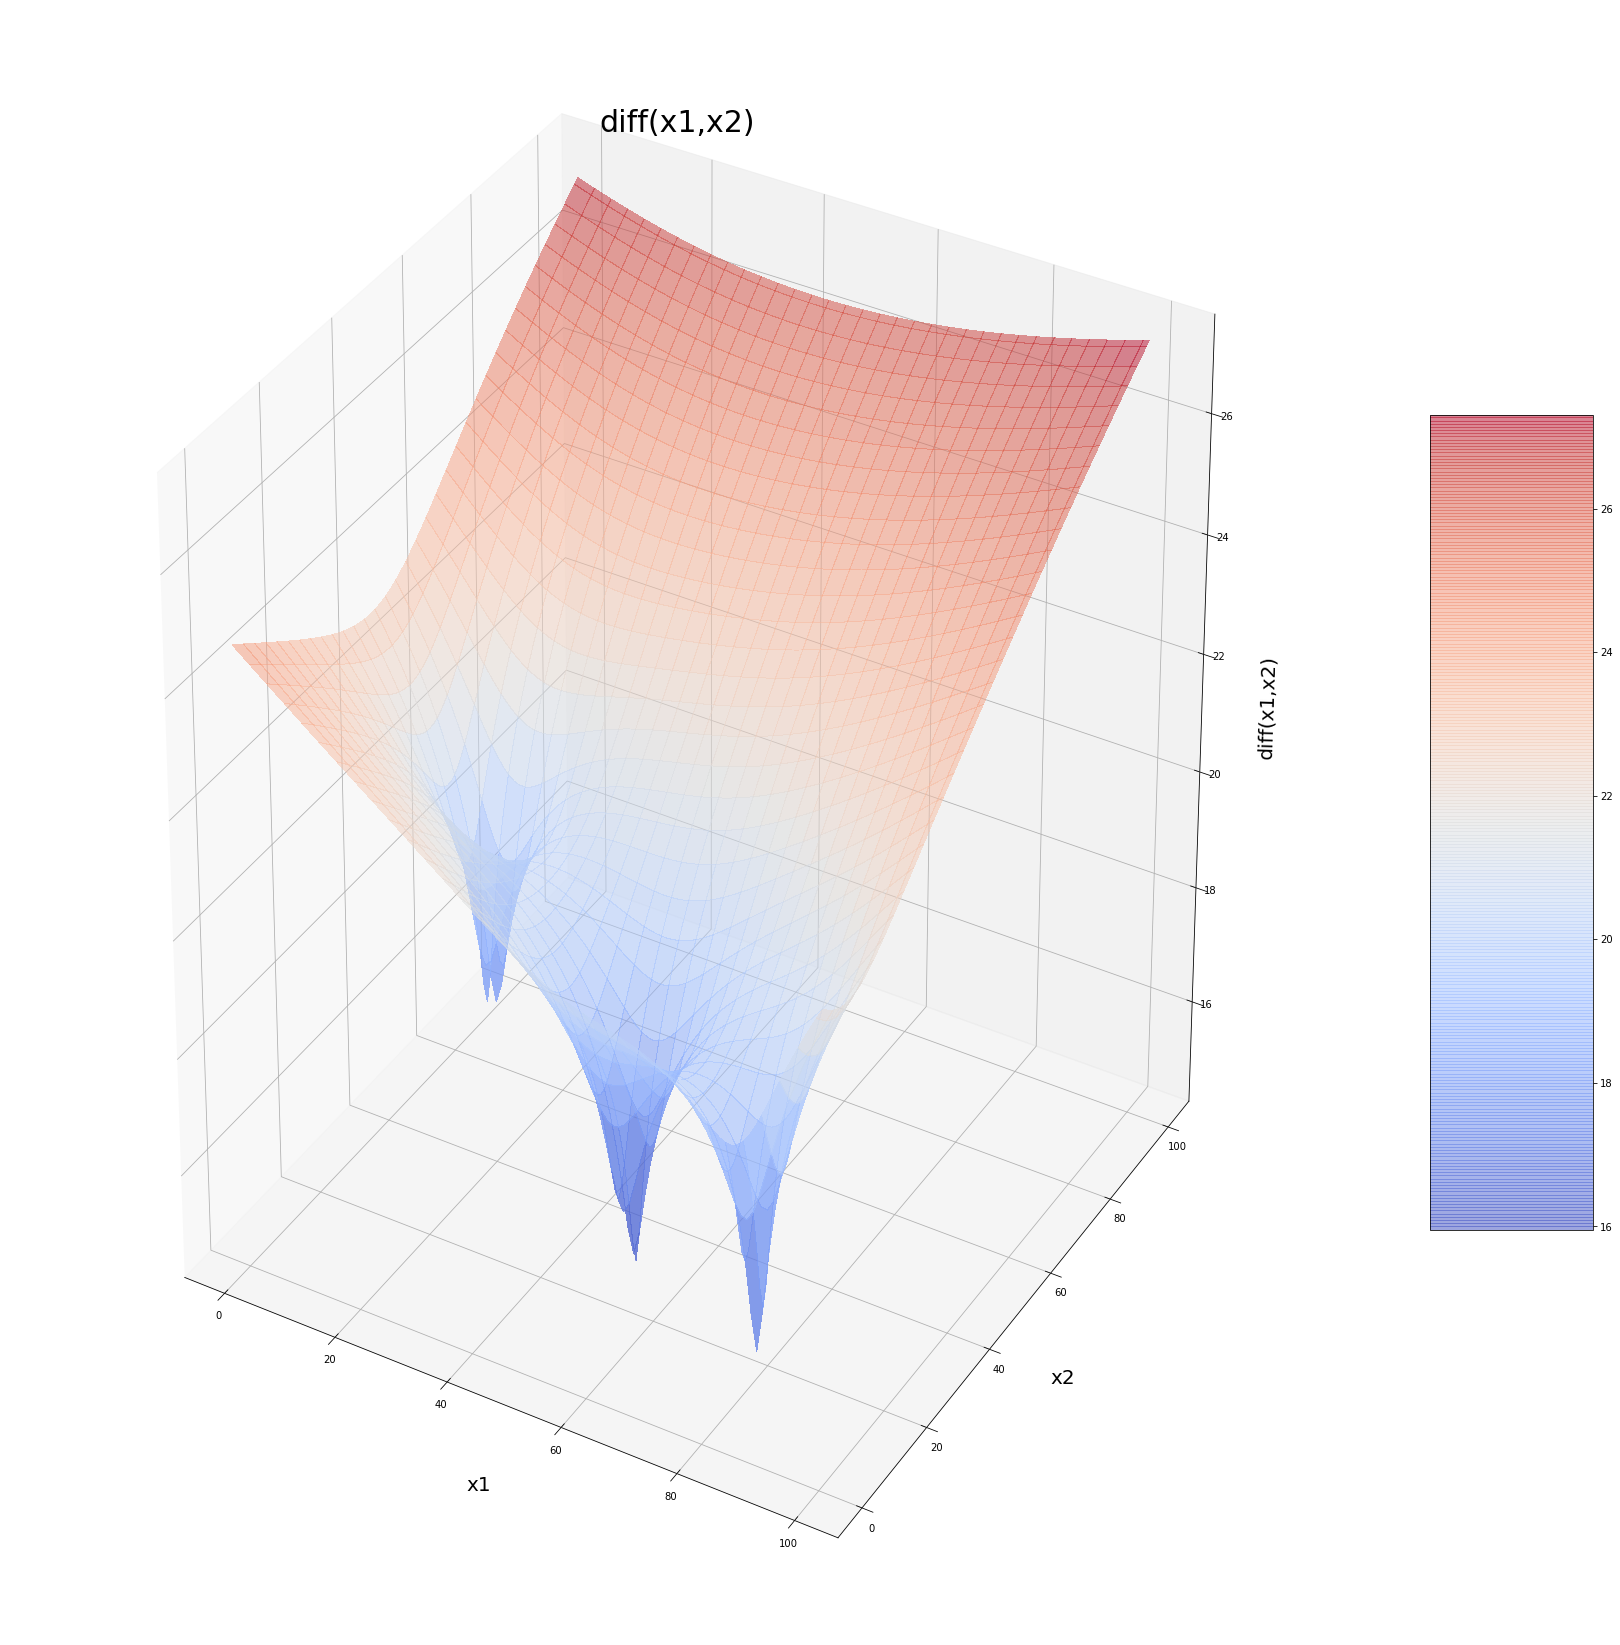

In [12]:
def create_diff_graph(title = "diff(x1,x2)", transparency = 0.5):
    fig = plt.figure(figsize=(30,30))
    ax = fig.gca(projection='3d')


    # Make data.
    xs = ys = np.arange(0, 101, 1) #this means we have data point for ever x1 and x2 0-100
    X, Y = np.meshgrid(xs, ys) #this combines x1 and x2 into a 0-100 x 0-100 grid
    zs = np.array([diff(np.array([x,y])) for x,y in zip(np.ravel(X), np.ravel(Y))]) #this claculates the diff for each point on the grid
    Z = zs.reshape(X.shape) #this formats all the diff data into the correct shape for matplotlib to use

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False, alpha=transparency) #this plots the funtion given the XYZ we calculated
                                                                               #we colour map so height is visualized

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5) #this creates the colour key on the right side

    #axes labels
    ax.set_xlabel('x1', labelpad=30, fontsize=20,)
    ax.set_ylabel('x2', labelpad=30, fontsize=20)
    ax.set_zlabel('diff(x1,x2)', labelpad=30, fontsize=20)

    plt.title(title, fontsize=30)
    
    return (fig, ax)

create_diff_graph()
plt.show()

## Part 10

Show the gradient field as well in a chart. Use a new plot or add the gradient to the original plot.

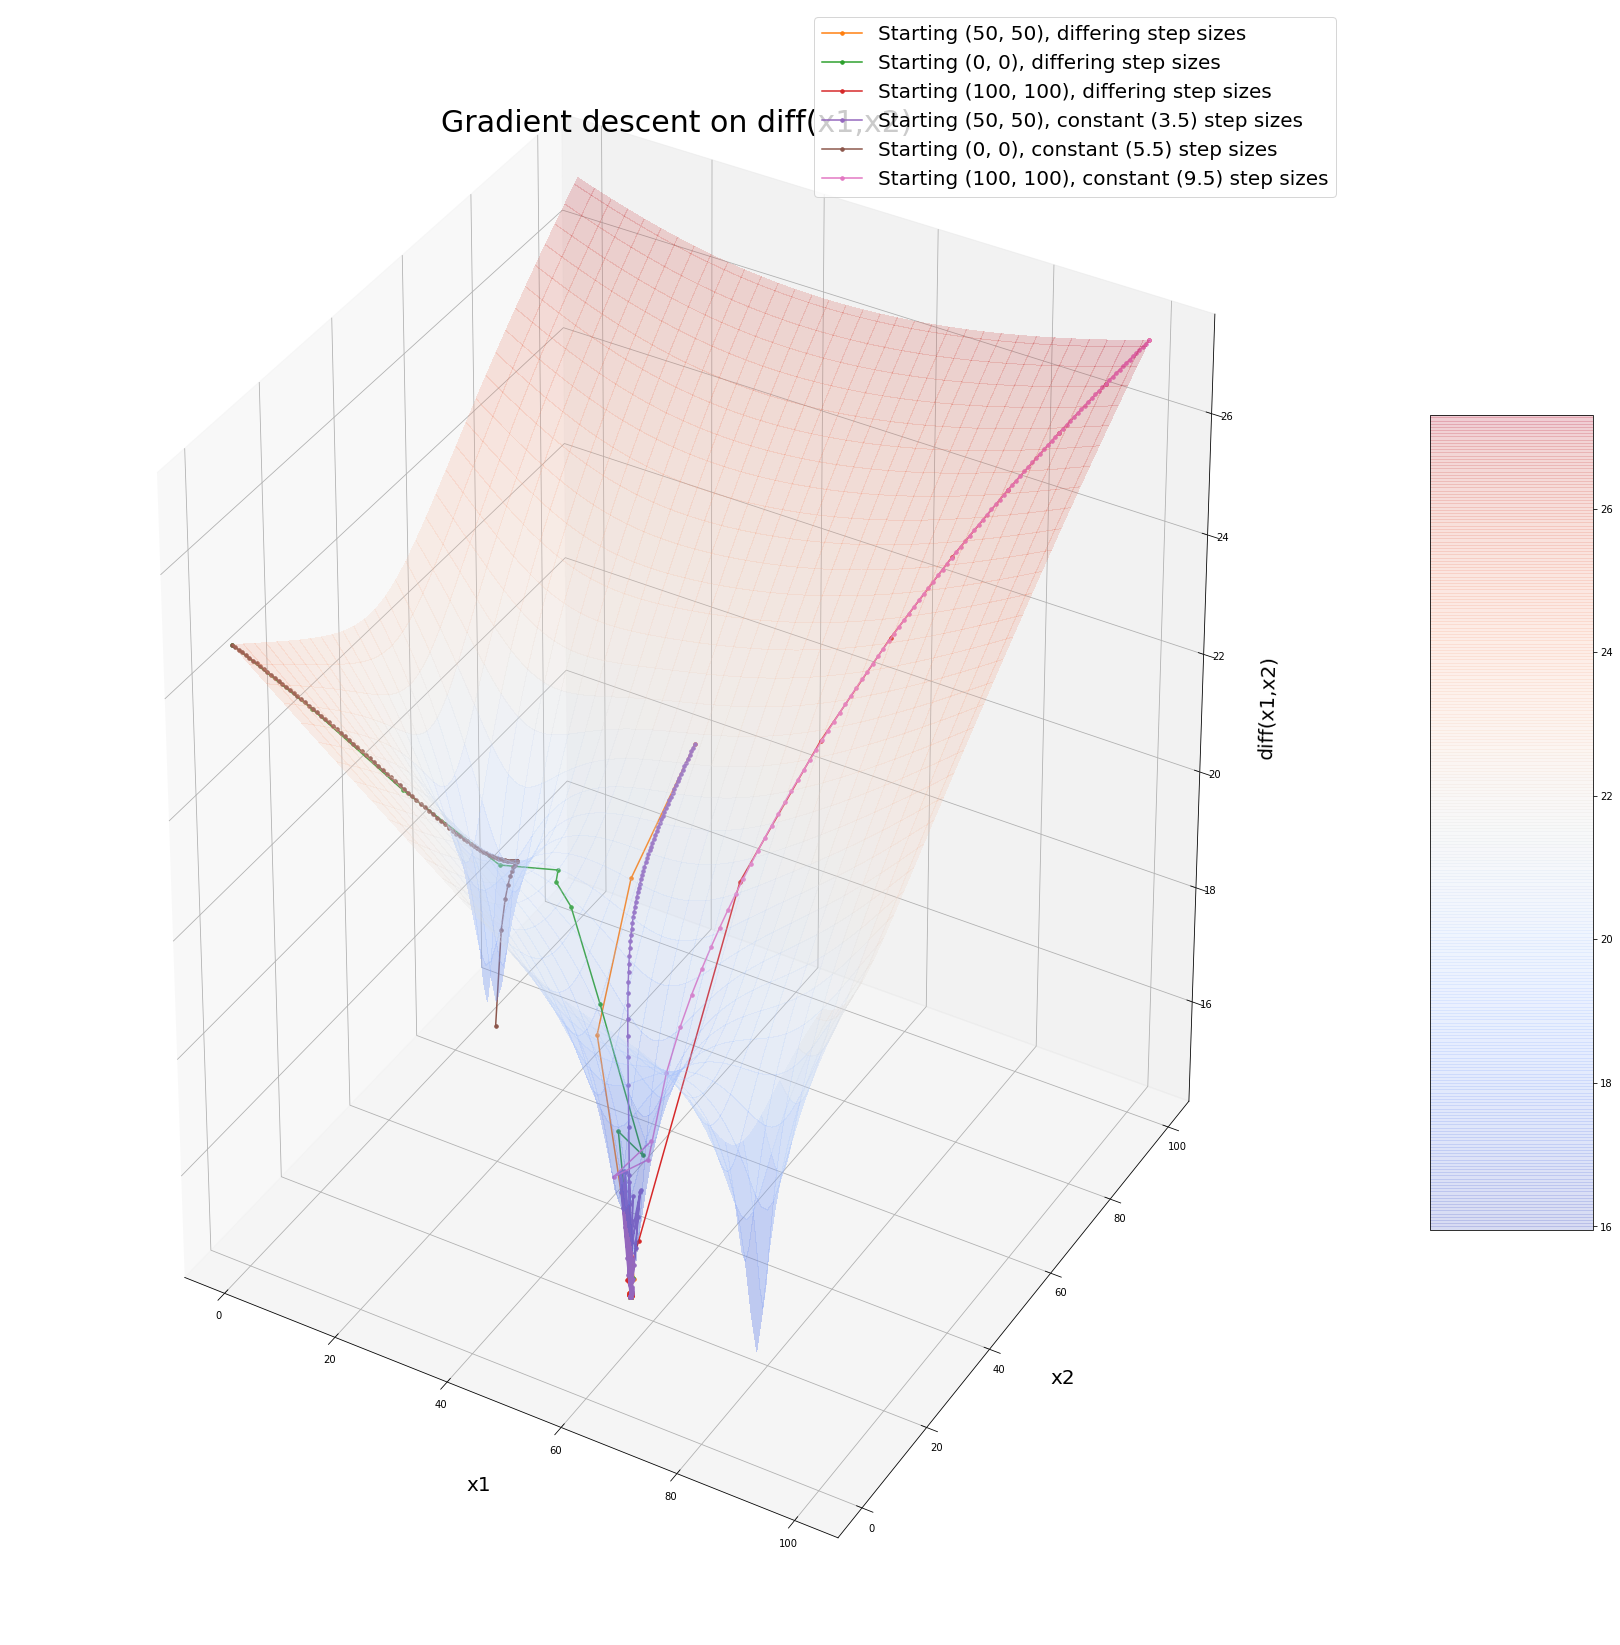

In [13]:
def get_steps_different_stepsize(x = xzero, initial_step_size = 128, allowed_error = 0.01):
    #this does gradient descent like in part 7 but storing variables instead of printing 
    result = [[x[0]], [x[1]], [diff(x)]]
    stepsize = initial_step_size
    while stepsize > allowed_error:
        diff_before_step = diff(x)
        new_x = xnext(x, stepsize)
        diff_after_step = diff(new_x)

        if diff_after_step >= diff_before_step:
            #bad step
            stepsize = stepsize/2
        else:
            #good step
            x = new_x
            result[0].append(x[0])
            result[1].append(x[1])
            result[2].append(diff_after_step)
    return result

def get_steps_constant_stepsize(x = xzero, stepsize = 3.5, number_of_steps = 100):
    #this does gradient descent like in part 7 but storing variables instead of printing 
    result = [[x[0]], [x[1]], [diff(x)]]
    for i in range (number_of_steps):
        x = xnext(x, stepsize)
        result[0].append(x[0])
        result[1].append(x[1])
        result[2].append(diff(x))
    return result


fig, ax = create_diff_graph(title="Gradient descent on diff(x1,x2)", transparency=0.2)

#gradient descent
#everything below does gradient descent once and then draws a line for that gradient descent
steps = get_steps_different_stepsize()
ax.plot(steps[0], steps[1], steps[2], marker='.', markersize=7, label='Starting (50, 50), differing step sizes')
steps = get_steps_different_stepsize(x = np.array([0., 0.]))
ax.plot(steps[0], steps[1], steps[2], marker='.', markersize=7, label='Starting (0, 0), differing step sizes')
steps = get_steps_different_stepsize(x = np.array([100., 100.]))
ax.plot(steps[0], steps[1], steps[2], marker='.', markersize=7, label='Starting (100, 100), differing step sizes')
# steps = get_steps_different_stepsize(x = np.array([100., 0.]))
# ax.plot(steps[0], steps[1], steps[2], marker='.', markersize=7, label='Starting (100, 100), differing step sizes')
# steps = get_steps_different_stepsize(x = np.array([0., 100.]))
# ax.plot(steps[0], steps[1], steps[2], marker='.', markersize=7, label='Starting (100, 100), differing step sizes')
#gradient descent
steps = get_steps_constant_stepsize()
ax.plot(steps[0], steps[1], steps[2], marker='.', markersize=7, label='Starting (50, 50), constant (3.5) step sizes')
steps = get_steps_constant_stepsize(x = np.array([0., 0.]), stepsize = 5.5)
ax.plot(steps[0], steps[1], steps[2], marker='.', markersize=7, label='Starting (0, 0), constant (5.5) step sizes')
steps = get_steps_constant_stepsize(x = np.array([100., 100.]), stepsize = 9.5)
ax.plot(steps[0], steps[1], steps[2], marker='.', markersize=7, label='Starting (100, 100), constant (9.5) step sizes')

#make a key for all the lines
ax.legend(fontsize=20)


plt.show()

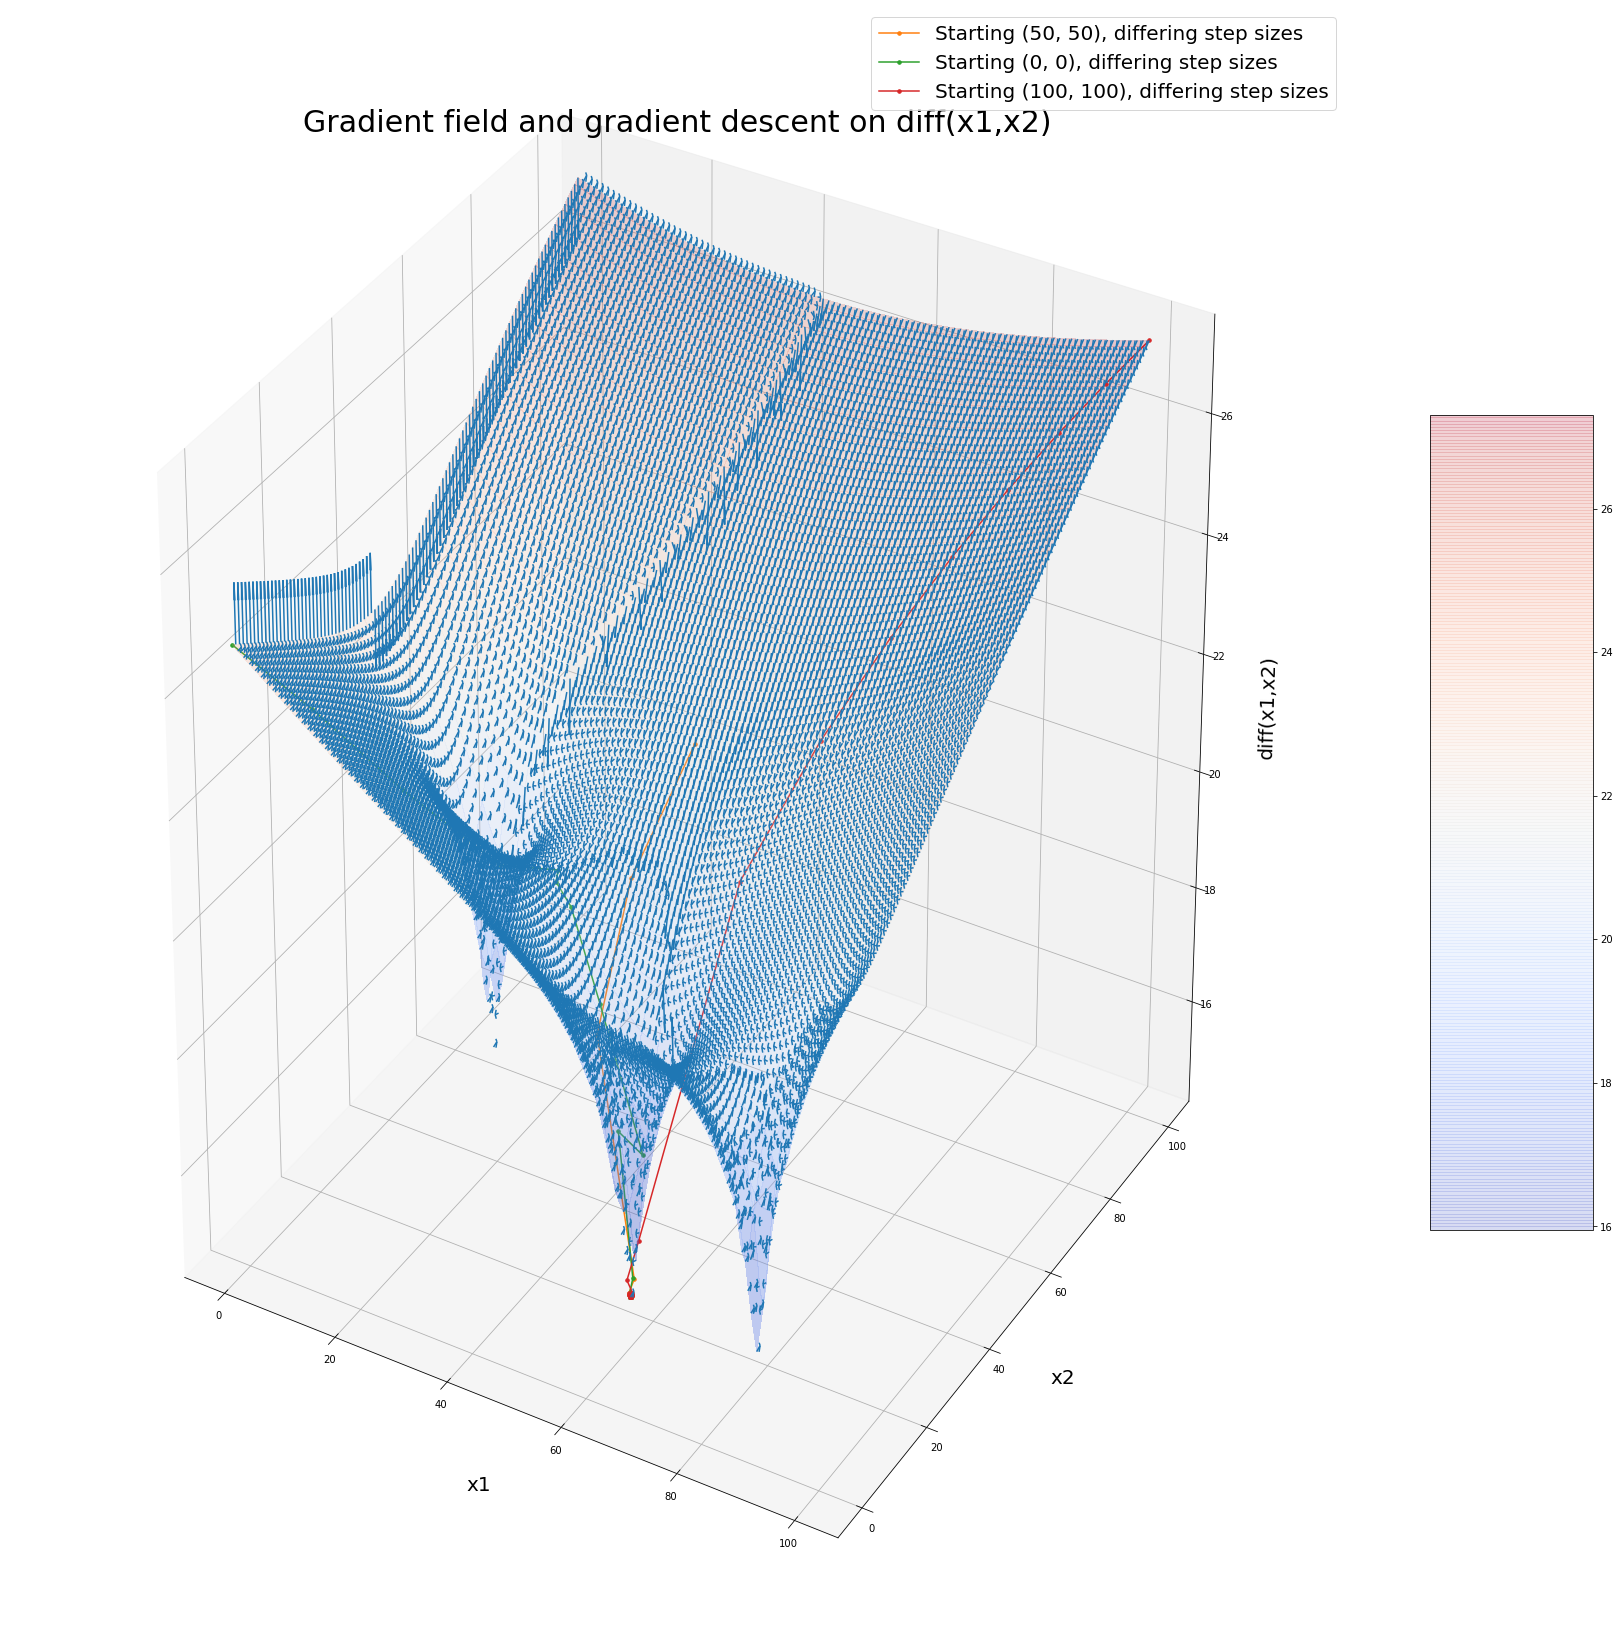

In [14]:
def get_gradients(xs, ys):
    #this takes a range of xs and ys, converts it into a grid and returns the gradient at each point on that grid
    #returns([[x values of grid], [y values of grid], [function output of that point on grid], [x component of gradient], [y component of gradient], [the difference in z (diff) as me move along gradient]])
    result = [[], [], [], [], [], []]
    for x in xs:
        for y in ys:
            result[0].append(x)
            result[1].append(y)
            result[2].append(diff(np.array([x, y])))
            g = gradient(np.array([x, y]))
            result[3].append(g[0])
            result[4].append(g[1])
            result[5].append(diff(xnext(np.array([x, y]), -1)) - diff(np.array([x, y])))
            #print(f'{g[0]}; {g[1]}; {diff(np.array(x+g[0], y+g[1])) - diff(np.array([x, y]))}')
    return result

fig, ax = create_diff_graph(title="Gradient field and gradient descent on diff(x1,x2)", transparency=0.2)

#gradient field
xs = ys = np.arange(0, 101, 1)
gradients = get_gradients(xs, ys) #gets info we need for gradient field (x, y, z, u, v, w), where (u, v, w) = gradient at (x, y, z)
ax.quiver(gradients[0], gradients[1], gradients[2], gradients[3], gradients[4], gradients[5], length=1, normalize=True)
        #above line draws gradient field given (x, y, z, u, v, w)
        # adding {length = 1, normalize=True} makes all the arrows large enough to see

#gradient descent
steps = get_steps_different_stepsize()
ax.plot(steps[0], steps[1], steps[2], marker='.', markersize=7, label='Starting (50, 50), differing step sizes')
steps = get_steps_different_stepsize(x = np.array([0., 0.]))
ax.plot(steps[0], steps[1], steps[2], marker='.', markersize=7, label='Starting (0, 0), differing step sizes')
steps = get_steps_different_stepsize(x = np.array([100., 100.]))
ax.plot(steps[0], steps[1], steps[2], marker='.', markersize=7, label='Starting (100, 100), differing step sizes')

#make a key for all the lines
ax.legend(fontsize=20)

plt.show()